# Name: Arka Lodh

# Clustering

# Using K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

## Importing the dataset

In [2]:
dataset = pd.read_csv('D:/Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = dataset.iloc[:,1:5].values

In [4]:
len(X)

150

## Using the elbow method to find the optimal number of clusters

D:\conda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


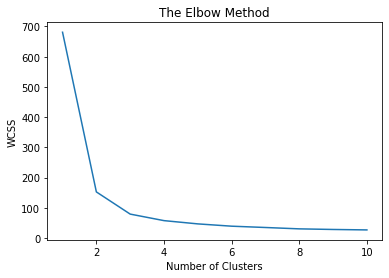

In [5]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init="k-means++",random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

we take 3 as the sharp curve ends at x=3

## Training the K-Means model on the dataset

In [6]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

In [7]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## Visualising the clusters

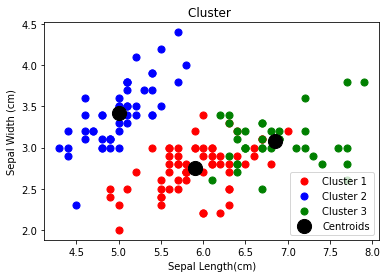

In [8]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1], s=50, color='red',label="Cluster 1")
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1], s=50, color='blue',label="Cluster 2")
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1], s=50, color='green',label="Cluster 3")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,color='black',label='Centroids')
plt.title('Cluster ')
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

This graph will actually have more than 2 axes but only 2 of them are shown here.

# Using Heirarchical Clustering

## Using the dendrogram to find the optimal number of clusters

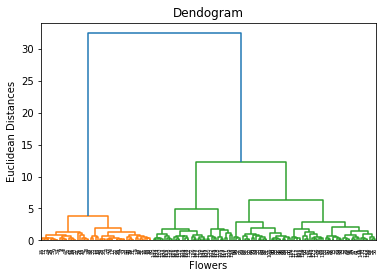

In [9]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendogram')
plt.xlabel('Flowers')
plt.ylabel('Euclidean Distances')
plt.show()

We take 3 as the number of clusters as we see that when we reduce clusters less than 3 we have huge dissimilarity

## Training the Hierarchical Clustering model on the dataset

In [10]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [11]:
print(y_hc)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## Visualising the clusters

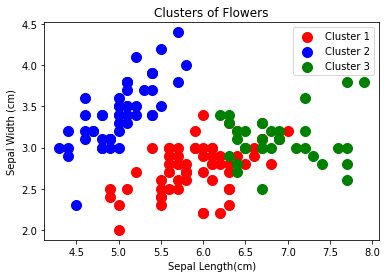

In [12]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.title('Clusters of Flowers')
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

This graph will actually have more than 2 axes but only 2 of them are shown here.

## Therefore, we see that both KMeans and Heirarchical Clustering produce same results

## The optimum number of clusters is 3